In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import to_categorical, plot_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path='/content/drive/My Drive/Colab Notebooks/emotion_detection/archive/train'
validate_path='/content/drive/My Drive/Colab Notebooks/emotion_detection/archive/test'

In [ ]:
import os

In [ ]:
print(os.listdir(train_path))

['disgust', 'fear', 'angry', 'surprise', 'sad', 'happy', 'neutral']


In [ ]:
print(os.listdir(validate_path))

['happy', 'surprise', 'fear', 'disgust', 'angry', 'sad', 'neutral']


In [ ]:
# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Preprocess all test images
train_generator = train_data_gen.flow_from_directory(
        '/content/drive/My Drive/Colab Notebooks/emotion_detection/archive/train',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28913 images belonging to 7 classes.


In [ ]:
# Preprocess all train images
validation_generator = validation_data_gen.flow_from_directory(
        '/content/drive/My Drive/Colab Notebooks/emotion_detection/archive/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 7222 images belonging to 7 classes.


In [ ]:
# create model structure
from keras.models import Sequential
emotion_model = Sequential()

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(3, 3)))
emotion_model.add(Dropout(0.25))

In [ ]:
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(3, 3)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))


In [ ]:
emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

In [ ]:
import cv2
cv2.ocl.setUseOpenCL(False)

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Train the neural network/model
emotion_model_info = emotion_model.fit_generator(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=7178 // 64)
 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/30
448/448 [==============================] - 5789s 13s/step - loss: 1.7860 - accuracy: 0.2607 - val_loss: 1.6938 - val_accuracy: 0.3051
Epoch 2/30
448/448 [==============================] - 318s 710ms/step - loss: 1.5227 - accuracy: 0.3969 - val_loss: 1.3549 - val_accuracy: 0.4782
Epoch 3/30
448/448 [==============================] - 316s 706ms/step - loss: 1.3432 - accuracy: 0.4818 - val_loss: 1.2548 - val_accuracy: 0.5152
Epoch 4/30
448/448 [==============================] - 316s 706ms/step - loss: 1.2654 - accuracy: 0.5166 - val_loss: 1.2185 - val_accuracy: 0.5261
Epoch 5/30
448/448 [==============================] - 317s 707ms/step - loss: 1.2151 - accuracy: 0.5332 - val_loss: 1.1835 - val_accuracy: 0.5361
Epoch 6/30
448/448 [==============================] - 321s 716ms/step - loss: 1.1693 - accuracy: 0.5538 - val_loss: 1.1419 - val_accuracy: 0.5642
Epoch 7/30
448/448 [==============================] - 316s 705ms/step - loss: 1.1286 - accuracy: 0.5725 - val_loss: 1.1413 - 

In [ ]:
import json
emotion_model_info.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

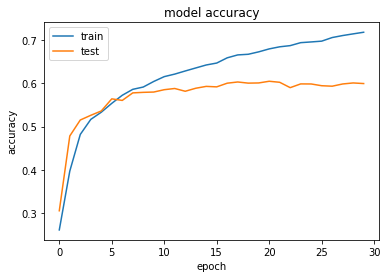

In [ ]:
plt.plot(emotion_model_info.history['accuracy'])
plt.plot(emotion_model_info.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

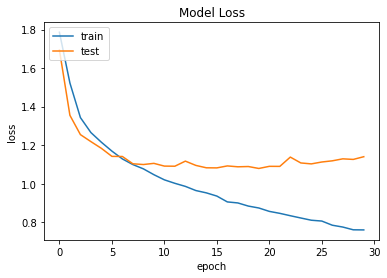

In [ ]:
plt.plot(emotion_model_info.history['loss'])
plt.plot(emotion_model_info.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()